In [2]:
import pandas as pd
import numpy as np

In [3]:
#import all flights for 2019
flights=pd.read_csv("Flight_2019_all.csv")

In [4]:
flights.head()

,AIMS_DAY,Flight_date,Flight_number,FLIGHT_POSTFIX,fltype1,FLTYPE,Flight_Status,cancelled,DOMESTIC,Departure_Station_Code,...,STA,actual_arrival_time,ATA,TOUCHDOWN_TIME,TDn,estimated_arrival_time,ETA,Freight_V,REG,Aircraft_Type_Iata
0,14245,00:00.0,864,,1,J,NaN,0,1,AKX,...,675,51:00.0,651,47:00.0,647,00:00.0,660,0,P4-KBC,320
1,14245,00:00.0,978,,1,J,NaN,0,1,AKX,...,795,01:00.0,781,58:00.0,778,59:00.0,779,0,P4-KCF,E90
2,14245,00:00.0,109,,1,J,NaN,0,0,ALA,...,795,06:00.0,786,00:00.0,780,16:00.0,796,0,P4-KDC,321
3,14245,00:00.0,127,,1,J,NaN,0,0,ALA,...,470,38:00.0,458,32:00.0,452,41:00.0,461,2698,P4-KBF,320
4,14245,00:00.0,153,,1,J,DV,0,0,ALA,...,520,32:00.0,512,27:00.0,507,42:00.0,522,0,P4-KBE,320


In [5]:
#modify all columns to lower case and remove bottom cases in names of columns
flights=flights.rename(columns=lambda x:x.replace('_', '').lower())

In [6]:
#after adjusting columns
flights.head()

,aimsday,flightdate,flightnumber,flightpostfix,fltype1,fltype,flightstatus,cancelled,domestic,departurestationcode,...,sta,actualarrivaltime,ata,touchdowntime,tdn,estimatedarrivaltime,eta,freightv,reg,aircrafttypeiata
0,14245,00:00.0,864,,1,J,NaN,0,1,AKX,...,675,51:00.0,651,47:00.0,647,00:00.0,660,0,P4-KBC,320
1,14245,00:00.0,978,,1,J,NaN,0,1,AKX,...,795,01:00.0,781,58:00.0,778,59:00.0,779,0,P4-KCF,E90
2,14245,00:00.0,109,,1,J,NaN,0,0,ALA,...,795,06:00.0,786,00:00.0,780,16:00.0,796,0,P4-KDC,321
3,14245,00:00.0,127,,1,J,NaN,0,0,ALA,...,470,38:00.0,458,32:00.0,452,41:00.0,461,2698,P4-KBF,320
4,14245,00:00.0,153,,1,J,DV,0,0,ALA,...,520,32:00.0,512,27:00.0,507,42:00.0,522,0,P4-KBE,320


In [7]:
# to get airport names and country names
airports=pd.read_csv("Airports.csv")

In [8]:
airports.head()

,AIRPORT,ICAO,COUNTRY,TERMINAL,PORTNAM,LONGITUD,LATITUDE
0,1XJ,EGDX,EG,,ST ATHAN,W003260800,N51241700
1,AAL,EKYT,EK,,AALBORG,E009505699,N57053404
2,AAN,OMAL,OM,,AL AIN INTL,E055363300,N24154200
3,ABA,UNAA,U,,ABAKAN,E091230600,N53443000
4,ADB,LTBJ,LT,,"IZMIR,ADNAN MENDERES",E027091800,N38172100


In [9]:
#domestic flights 
domestic=flights[flights.domestic==1]

In [10]:
#all domestic airports of Air Astana in Kazakhstan
domestic.departurestationcode.unique()

array(['AKX ', 'ALA ', 'CIT ', 'GUW ', 'KGF ', 'KZO ', 'PWQ ', 'SCO ',
       'TSE ', 'UKK ', 'URA ', 'KSN ', 'DMB ', 'PLX '], dtype=object)

In [11]:
international=flights[flights.domestic==0]

In [12]:
#all international destinations of Air Astana in Kazakhstan
international.departurestationcode.unique()

array(['ALA ', 'AMS ', 'BKK ', 'DEL ', 'DXB ', 'FRA ', 'FRU ', 'GUW ',
       'HKG ', 'ICN ', 'IST ', 'KBP ', 'KUL ', 'LED ', 'LHR ', 'OMS ',
       'OVB ', 'PEK ', 'SVO ', 'SVX ', 'TAS ', 'TBS ', 'TSE ', 'URC ',
       'DYU ', 'GYD ', 'KZN ', 'URA ', 'CDG ', 'XMN ', 'ESB ', 'MRV ',
       'BYJ ', 'MSQ ', 'SCO ', 'JAI ', 'CIT ', 'SJK ', 'REC ', 'DUS ',
       'FAO ', 'MCT ', 'EXT ', 'KEF ', 'BGR ', 'ANC ', 'SEN ', 'BLL ',
       'BOH ', 'AYT ', 'BJV ', 'SSH ', 'BTS ', 'NWI ', 'TLS ', 'XFW ',
       'DME ', 'HEL ', 'BRU ', 'MST ', 'AGP ', 'ZIA ', 'KTT '],
      dtype=object)

In [13]:
#in the system named AIMS, the country code of Kazakhstan is UA
qaz=(airports[airports.COUNTRY=='UA'])

In [14]:
#to merge with main table Flights we need to change the name of column
qaz=qaz.rename(columns={"AIRPORT":"departurestationcode"})

In [15]:
#check all re-routed flight or return from air to departure station
rr=international[international.departurestationcode==(international.arrivalstationcode)].head()


In [16]:
rr[['flightnumber', 'departurestationcode', 'arrivalstationcode']]

,flightnumber,departurestationcode,arrivalstationcode
276,918,IST,IST
397,210,ICN,ICN
868,208,DXB,DXB
1096,904,AMS,AMS
1235,870,IST,IST


In [17]:
#to check international airport code in the list of airports from file Airports 
international=international[international.departurestationcode.isin(qaz.departurestationcode)]


In [18]:
# to define that departure code in the list of Kazakhstan airports, but arrival station code not in list of KZ airports
international=international[~international.arrivalstationcode.isin(qaz.departurestationcode)]

In [19]:
international.columns

Index(['aimsday', 'flightdate', 'flightnumber', 'flightpostfix', 'fltype1',
       'fltype', 'flightstatus', 'cancelled', 'domestic',
       'departurestationcode', 'departurestationname', 'arrivalstationcode',
       'arrivalstationname', 'scheduleddeparturedate',
       'scheduleddeparturetime', 'std', 'actualdeparturetime', 'atd',
       'takeofftime', 'tkof', 'estimateddeparturetime', 'etd',
       'scheduledarrivaltime', 'sta', 'actualarrivaltime', 'ata',
       'touchdowntime', 'tdn', 'estimatedarrivaltime', 'eta', 'freightv',
       'reg', 'aircrafttypeiata'],
      dtype='object')

In [20]:
international.head()

,aimsday,flightdate,flightnumber,flightpostfix,fltype1,fltype,flightstatus,cancelled,domestic,departurestationcode,...,sta,actualarrivaltime,ata,touchdowntime,tdn,estimatedarrivaltime,eta,freightv,reg,aircrafttypeiata
2,14245,00:00.0,109,,1,J,NaN,0,0,ALA,...,795,06:00.0,786,00:00.0,780,16:00.0,796,0,P4-KDC,321
3,14245,00:00.0,127,,1,J,NaN,0,0,ALA,...,470,38:00.0,458,32:00.0,452,41:00.0,461,2698,P4-KBF,320
4,14245,00:00.0,153,,1,J,DV,0,0,ALA,...,520,32:00.0,512,27:00.0,507,42:00.0,522,0,P4-KBE,320
8,14245,00:00.0,401,,1,J,NaN,0,0,ALA,...,1120,20:00.0,1100,12:00.0,1092,33:00.0,1113,0,P4-KBC,320
16,14245,00:00.0,871,,1,J,NaN,0,0,ALA,...,325,19:00.0,319,14:00.0,314,18:00.0,318,35,P4-KDC,321


In [21]:
#all international destinations of Air Astana for the 2019 year
international.arrivalstationcode.unique()

array(['FRU ', 'TAS ', 'SVO ', 'KBP ', 'PEK ', 'DXB ', 'DEL ', 'IST ',
       'BKK ', 'URC ', 'AMS ', 'TBS ', 'OVB ', 'SVX ', 'OMS ', 'FRA ',
       'LHR ', 'GYD ', 'DYU ', 'LED ', 'ICN ', 'KZN ', 'HKG ', 'KUL ',
       'CDG ', 'MRV ', 'ESB ', 'XMN ', 'MSQ ', 'JAI ', 'DUS ', 'EXT ',
       'MCT ', 'KEF ', 'ANC ', 'AYT ', 'BTS ', 'BJV ', 'SSH ', 'MST ',
       'DME ', 'HEL ', 'BRU ', 'ZIA ', 'KTT '], dtype=object)

In [22]:
#The type of Flights from AIMS, C is Charter, P is Positioning/Ferry, J is Scheduled Flights
international.fltype.unique()

array(['J', 'P', 'C'], dtype=object)

In [23]:
['aimsday', 'flightdate', 'flightnumber', 'flightpostfix', 'fltype1',
       'fltype', 'flightstatus', 'cancelled', 'domestic',
       'departurestationcode', 'departurestationname', 'arrivalstationcode',
       'arrivalstationname', 'scheduleddeparturedate',
       'scheduleddeparturetime', 'std', 'actualdeparturetime', 'atd',
       'takeofftime', 'tkof', 'estimateddeparturetime', 'etd',
       'scheduledarrivaltime', 'sta', 'actualarrivaltime', 'ata',
       'touchdowntime', 'tdn', 'estimatedarrivaltime', 'eta', 'freightv',
       'reg', 'aircrafttypeiata'],
      dtype='object')

IndentationError: unexpected indent (<ipython-input-23-38ac20d48160>, line 10)

In [24]:
intflights=international[['flightnumber', 'flightdate', 'flightpostfix','flightstatus',
               'fltype','departurestationcode', 'arrivalstationcode',]]

In [25]:
intflights.head()

,flightnumber,flightdate,flightpostfix,flightstatus,fltype,departurestationcode,arrivalstationcode
2,109,00:00.0,,NaN,J,ALA,FRU
3,127,00:00.0,,NaN,J,ALA,TAS
4,153,00:00.0,,DV,J,ALA,SVO
8,401,00:00.0,,NaN,J,ALA,KBP
16,871,00:00.0,,NaN,J,ALA,SVO


In [26]:
# the number of flights to international airports from domestic airports
intflights.groupby('departurestationcode')['arrivalstationcode'].value_counts()

departurestationcode  arrivalstationcode
ALA                   SVO                   637
                      FRU                   502
                      TAS                   483
                      IST                   398
                      DXB                   377
                                           ... 
TSE                   ESB                     1
                      KTT                     1
URA                   FRA                    52
                      EXT                     2
                      MST                     1
Name: arrivalstationcode, Length: 72, dtype: int64

In [27]:
#all international flights from Almaty (ALA)
alaintflights=intflights[intflights['departurestationcode'].str.strip()=='ALA']

In [28]:
alaintflights.head()

,flightnumber,flightdate,flightpostfix,flightstatus,fltype,departurestationcode,arrivalstationcode
2,109,00:00.0,,NaN,J,ALA,FRU
3,127,00:00.0,,NaN,J,ALA,TAS
4,153,00:00.0,,DV,J,ALA,SVO
8,401,00:00.0,,NaN,J,ALA,KBP
16,871,00:00.0,,NaN,J,ALA,SVO


In [29]:
# count 
alaintflights.groupby('departurestationcode')['arrivalstationcode'].value_counts()

departurestationcode  arrivalstationcode
ALA                   SVO                   637
                      FRU                   502
                      TAS                   483
                      IST                   398
                      DXB                   377
                      DEL                   370
                      KBP                   360
                      LED                   348
                      PEK                   321
                      DYU                   294
                      TBS                   290
                      ICN                   273
                      URC                   234
                      BKK                   229
                      GYD                   163
                      HKG                   156
                      KUL                   156
                      DME                   133
                      AYT                   104
                      SSH                    59

In [30]:
# pivot destinations by ALA
alaintpvt=alaintflights.pivot_table(index=['departurestationcode'], columns=['arrivalstationcode'],
                               values='flightnumber', aggfunc='count')

In [31]:
alaintpvt.head()

arrivalstationcode,ANC,AYT,BJV,BKK,DEL,DME,DXB,DYU,ESB,FRU,...,MRV,OMS,OVB,PEK,SSH,SVO,TAS,TBS,URC,XMN
departurestationcode,,,,,,,,,,,,,,,,,,,,,
ALA,1,104,27,229,370,133,377,294,1,502,...,4,1,5,321,59,637,483,290,234,3


In [32]:
#all international flights from Nursultan (TSE, but from 08 of June it is NQZ)
tseintflights=intflights[intflights['departurestationcode'].str.strip()=='TSE']

In [33]:
tseintflights.groupby('departurestationcode')['arrivalstationcode'].value_counts()

departurestationcode  arrivalstationcode
TSE                   SVO                   500
                      FRA                   365
                      OVB                   359
                      SVX                   357
                      OMS                   302
                      TAS                   288
                      LED                   279
                      IST                   273
                      DXB                   255
                      LHR                   251
                      KBP                   227
                      URC                   227
                      PEK                   186
                      TBS                   184
                      FRU                   172
                      GYD                   162
                      CDG                   121
                      KZN                   112
                      DME                   104
                      ICN                   104

In [34]:
# all domestic airports which has international routes
intflights.departurestationcode.unique()

array(['ALA ', 'GUW ', 'TSE ', 'URA ', 'SCO ', 'CIT '], dtype=object)

In [35]:
# all international flights from Shymkent
intflights[intflights['departurestationcode'].str.strip()=='CIT']

,flightnumber,flightdate,flightpostfix,flightstatus,fltype,departurestationcode,arrivalstationcode
5827,895,00:00.0,D,NaN,J,CIT,DXB
46813,151,00:00.0,D,NaN,J,CIT,FRU


In [36]:
alaintflights.departurestationcode.value_counts()

ALA     5959
Name: departurestationcode, dtype: int64

In [37]:
alaintflights.arrivalstationcode.value_counts()

SVO     637
FRU     502
TAS     483
IST     398
DXB     377
DEL     370
KBP     360
LED     348
PEK     321
DYU     294
TBS     290
ICN     273
URC     234
BKK     229
GYD     163
KUL     156
HKG     156
DME     133
AYT     104
SSH      59
BJV      27
MCT      25
OVB       5
MRV       4
XMN       3
HEL       3
ESB       1
JAI       1
KEF       1
ANC       1
OMS       1
Name: arrivalstationcode, dtype: int64

In [38]:
fromala=intflights.arrivalstationcode.value_counts()

In [39]:
import matplotlib.pyplot as plt
% matplotlib inline 
plt.style.use('ggplot')

UsageError: Line magic function `%` not found.


In [ ]:
fromala.plot(kind='bar', figsize=(12,7), color ='blue', alpha=0.5)
plt.title('Flights of Air Astana in 2019 from ALA', fontsize=20)
plt.xlabel('Destinations',fontsize=16)
plt.ylabel('Number of flights',fontsize=16)

In [40]:
fromala.head()

SVO     1137
IST      778
TAS      771
FRU      676
DXB      633
Name: arrivalstationcode, dtype: int64

Text(0, 0.5, 'Number of flights')

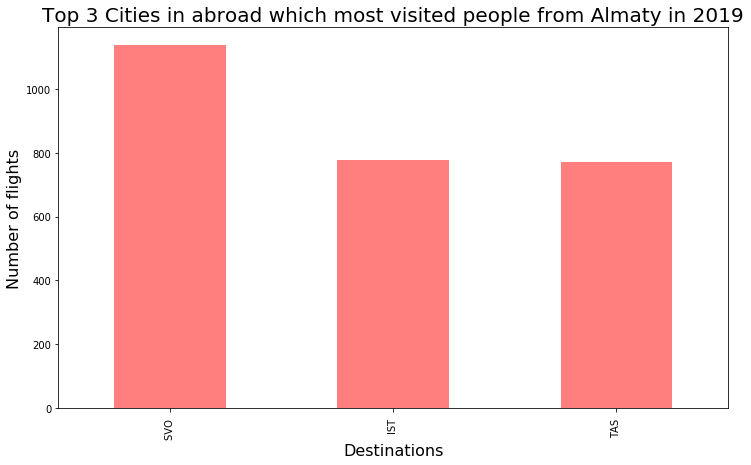

In [41]:
fromala.head(3).plot(kind='bar', figsize=(12,7), color ='red', alpha=0.5)
plt.title('Top 3 Cities in abroad which most visited people from Almaty in 2019', fontsize=20)
plt.xlabel('Destinations',fontsize=16)
plt.ylabel('Number of flights',fontsize=16)

In [ ]:
#thank you for your attention!